# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>In this analysis we will answer a very important question
(What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?) 
This analysis will go through several stages : Data wrangling then Data cleaning both of this will help us to go thrught step 3 
which is find relations between our data (Exploratory Data Analysis) and finally We will obtain conclusions that will help us improve our performance. 

>Be focus !

<a id='wrangling'></a>
## Data Wrangling
> In this step we will import libraries wich will help us in our analysis and explore our data to know what operation we need to do to make our data clean and tidy .

In [1]:
#importing libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#uploading dataset using pandas.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

> After uploading data we need to assess it.

In [3]:
#showing first 5 rows in data 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#showing important information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#showing some stattistics about data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#showing sum of doplicated rows 
df.duplicated().sum()

0

>Some queries to make the data more clear.

In [7]:
#showing data-types of some columns
type(df.Gender[0])
type(df.ScheduledDay[0])
type(df.AppointmentDay[0])
type(df.Neighbourhood[0])
type(df['No-show'][0])

str

In [8]:
#showing first element in some columns 
df.ScheduledDay[0]
df.AppointmentDay[0]
df.PatientId[0]

29872499824296.0

In [9]:
#showing if there are ages = 0 ?
df.query("Age == '0'")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


# Decisions after assessing 
- removing [ PatientId , AppointmentID , ScheduledDay , AppointmentDay ] because I saw These columns won't affect our anlysis
- rename "No-show" column to "No_show" according to the rules for naming variables
- rename "Hipertension" column to "Hypertension" because this is a typo
- replacing ages zero values to mean of age because there are no ages equal to zero
- making negative ages postive because there are no ages negative 

### Data Cleaning 
> After assessing our data i find some problems which it need to be cleaned 
In this step we will clean our data to be ready for exploratory.


In [10]:
#make copy from data to make real dataset save.
df_clean = df.copy()

> It's time to implement decisions ! 

In [11]:
#delete columns using pandas.
df_clean.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'] , axis=1 , inplace = True)

In [12]:
#rename column to be easy to understand.
df_clean.rename(columns={'No-show': 'No_show'}, inplace=True)

In [13]:
#rename column to be easy to understand.
df_clean.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

In [14]:
#replacing ages with value 0 with the mean of ages 
df_clean['Age'].replace(0, df_clean['Age'].mean() , inplace = True)

In [15]:
#making negative ages postive
df_clean['Age'] = df_clean['Age'].abs()

## Testing 

In [16]:
#showing important information about data 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Gender         110527 non-null  object 
 1   Age            110527 non-null  float64
 2   Neighbourhood  110527 non-null  object 
 3   Scholarship    110527 non-null  int64  
 4   Hypertension   110527 non-null  int64  
 5   Diabetes       110527 non-null  int64  
 6   Alcoholism     110527 non-null  int64  
 7   Handcap        110527 non-null  int64  
 8   SMS_received   110527 non-null  int64  
 9   No_show        110527 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 8.4+ MB


In [17]:
#showing some stattistics about data 
df_clean.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276453,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,22.104845,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question .
- (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment ?)

>At first We need to know some information about data and attendance rate 

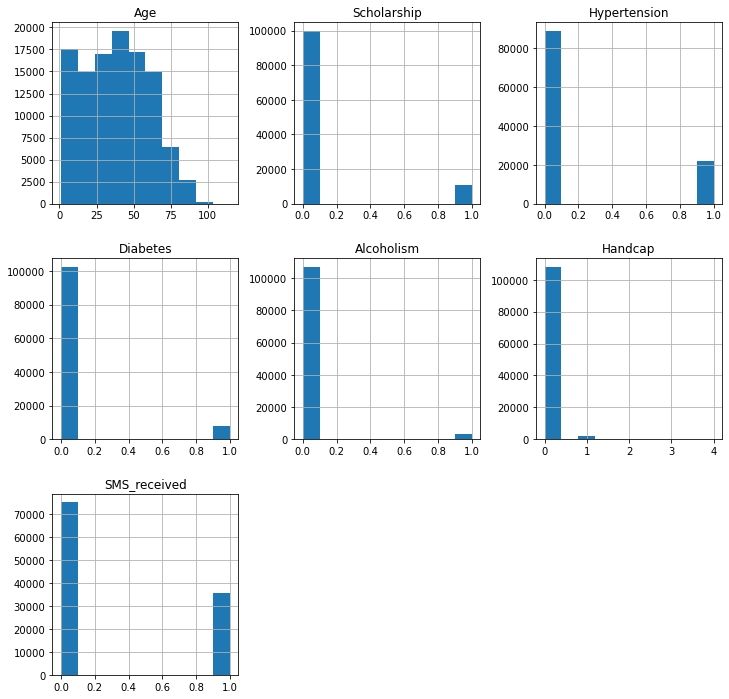

In [18]:
#showing some histograms which explain some information about data 
df_clean.hist(figsize=(12,12));

Text(0, 0.5, 'count')

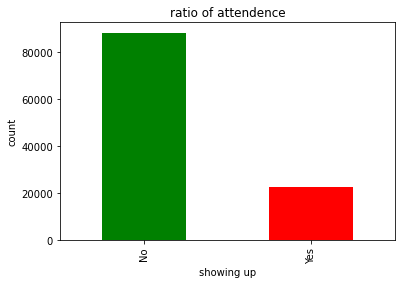

In [19]:
#showing ratio of attendence 
df_clean.No_show.value_counts().plot.bar(color=['green','red']);
#naming the tile of plot 
plt.title("ratio of attendence")
#naming xlabel 
plt.xlabel("showing up")
#naming ylabel 
plt.ylabel("count")

- We have seen that the attendance rate is higher than the absence rate, which is almost equal to 4 times
- Most of patients didn't suffer from  Alcoholism and Handcap
- about 10% from patient enrolled in Brasilian welfareprogram
- about 19% from patient suffered from hypertension   
- Numbers of who recieved sms is half of who didn't 


>Secondly , we want to know the relationships between all the data and showing up.

In [20]:
# making function find the relation between any columns and No_show column to help us find raltionships 
def relation(x):
    (df_clean.groupby([x,'No_show']).size()
                                        .unstack(x)
                                        .apply(lambda x : x/x.sum())
                                        .plot.bar(title = "discovering reasons of show up and no show" , rot=0 , width = .9 , color=['blue','orange'] , ylabel="count of patients"));

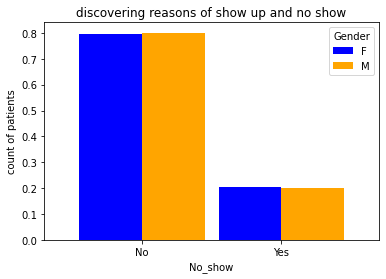

In [21]:
relation('Gender')

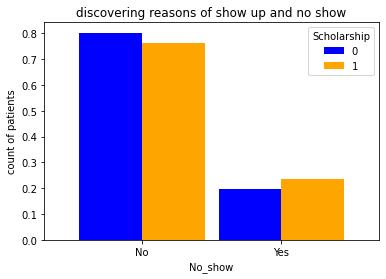

In [22]:
relation("Scholarship")

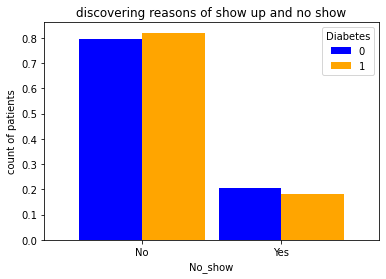

In [23]:
relation('Diabetes')       

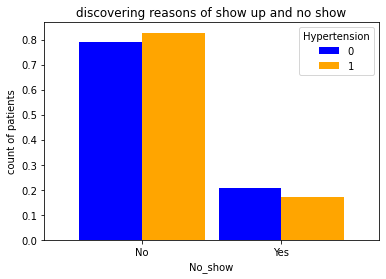

In [24]:
relation("Hypertension")

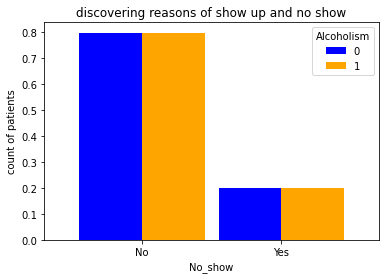

In [25]:
relation("Alcoholism")

> There is no clear relationship between  (Gender,Scholarship,Diabetes,Alcoholism,Handcap) and showing up.

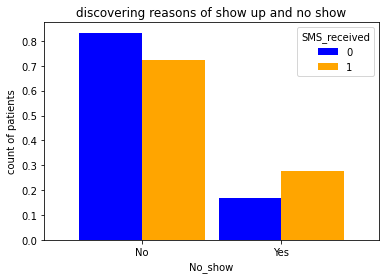

In [26]:
relation("SMS_received")

> There is a strange relationship between receiving messages and showing up As the percentage of recipients of messages and no attendance Greater than the percentage of non-recipients of messages and attendees

Text(0, 0.5, 'patients')

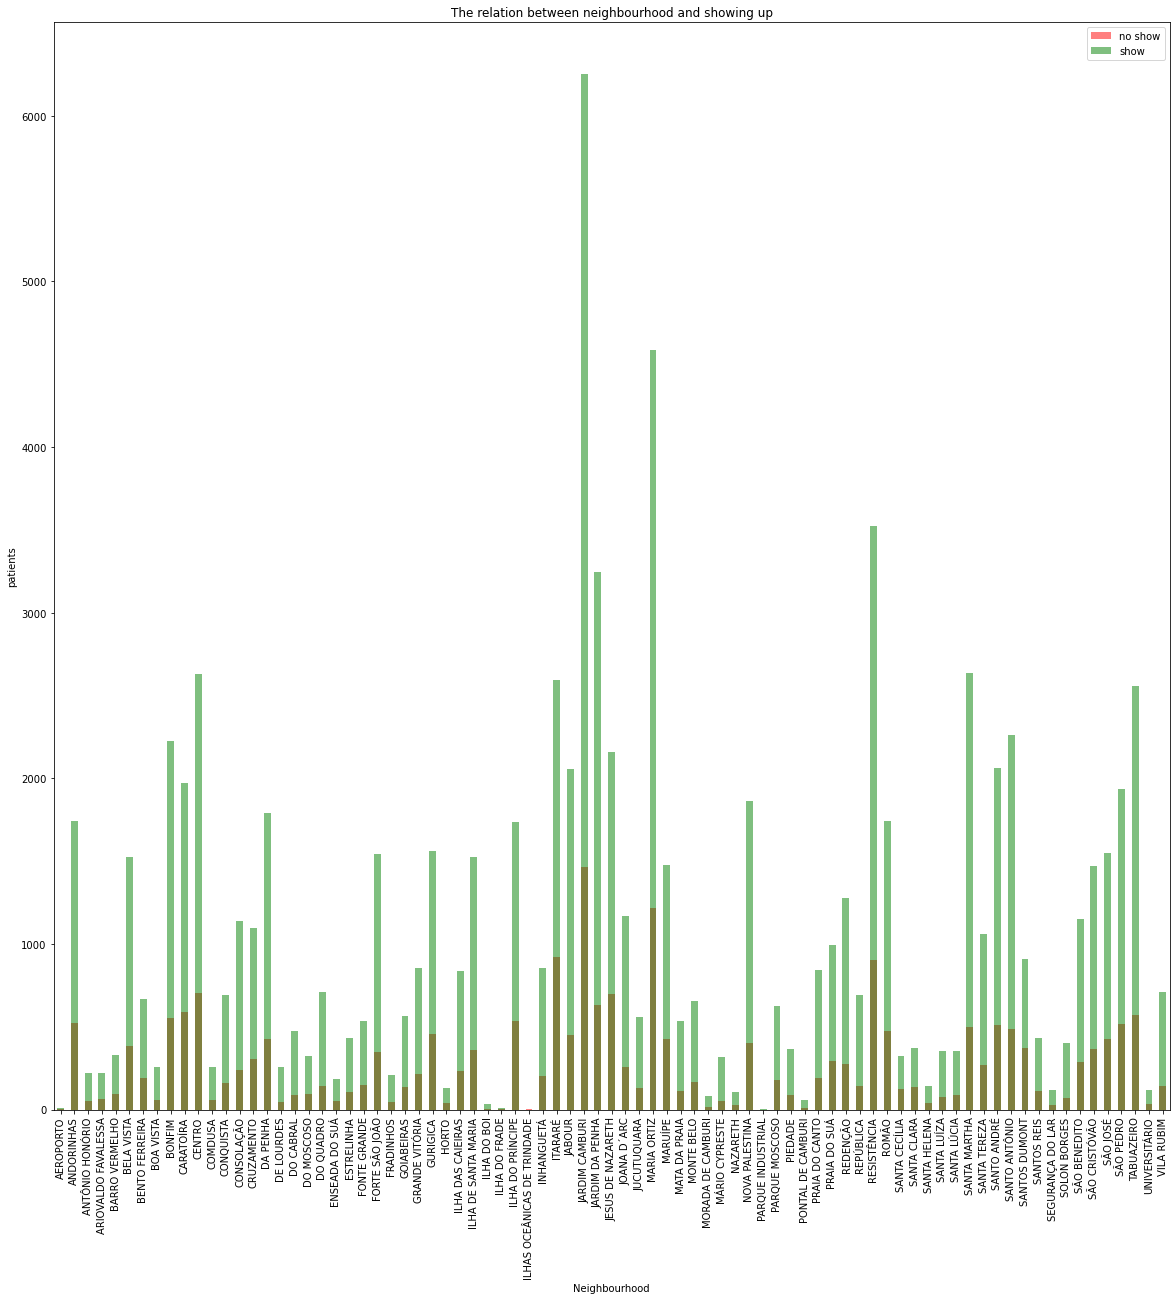

In [27]:
#size of plot 
plt.figure(figsize=[20,20])
#Determine the desired part
e = df_clean.groupby(['Neighbourhood','No_show']).size().unstack()
e.Yes.plot(kind='bar' , alpha=.5 , color = 'red' , label= 'no show')
e.No.plot(kind='bar' , alpha=.5 , color = 'green' , label= 'show')
plt.legend()
plt.title("The relation between neighbourhood and showing up")
plt.xlabel("Neighbourhood")
plt.ylabel("patients")

>there is a clear relationship between Neighbourhood and showing up we can see clearly

<a id='conclusions'></a>
## Conclusions



- there is s strong relation between Neighbourhood and showing up 
- there is some thing strange about relation between sms and attendence 
- No abvisuos relation between showing up and Hypertension, Diabetes, Alcoholism and  Handcap   

### Limitations
> couldn't detect correlation between showing/no_showing and Hypertension, Diabetes, Alcoholism and  Handcap   

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295